In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
from random import shuffle

In [2]:
population = pd.read_csv('../data/world-population-by-country-2020-with-nulls.csv')
display(population.head())
print(population.shape)

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",N.A.,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",NaN,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",N.A.,"1,811,570",NaN,2.3,NaN,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


(235, 12)


Load some more data

In [3]:
tickets = pd.read_csv('../data/tickets_processed.csv')
vikings = pd.read_csv('../data/vikings.csv')
le = pd.read_csv('../data/life_expectancy.csv')
pres_data = pd.read_csv('../data/presidential_appointments.csv')

Clean up the population data

In [4]:
def cast_to_number(some_text):
    """converts a string to a number by removing commas and percentage signs
    """
    if isinstance(some_text, float):  # already a number!
        return some_text
    no_commas = some_text.replace(',', '')
    no_percent = no_commas.replace('%', '')
    number = float(no_percent)
    return number

In [5]:
population['Population 2020'] = population['Population 2020'].apply(cast_to_number)

In [6]:
population = population.replace('N.A.', np.nan)

In [7]:
for c in population.columns:
    try:
        population[c] = population[c].apply(cast_to_number)
    except:
        pass

In [8]:
# fix those commas first
population['Land Area (Km²)'] = population['Land Area (Km²)'].apply(cast_to_number)

# then convert values
population['Land Area (mi²)'] = population['Land Area (Km²)'] * 0.386102 # sq. miles / sq. km

In [9]:
population['Density  (P/mi²)'] = population['Population 2020'] / population['Land Area (mi²)']

# Data Visualization 📊

Data visualization is vitally important for understandgin our data. To determine how it spread, we are likely to use **scatter plots**, **bar plots**, and **histograms**

We will cover:
* 3 basic graph using Python
* How to create visualizations for a broad audience. axes.



## Scatter plots

Used only with numeric data

Plot 2-3 variables against one another on a set of x-y(-z axes).

In [10]:
population.head()

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Land Area (mi²),Density (P/mi²)
0,1,China,1.439324e+09,0.39,5540090.0,153.0,9388211.0,-348399.0,NaN,38.0,61.0,18.47,3.624807e+06,397.075971
1,2,India,1.380004e+09,0.99,13586631.0,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70,1.147955e+06,1202.141948
2,3,United States,3.310027e+08,0.59,1937734.0,NaN,9147420.0,954806.0,1.8,38.0,83.0,4.25,3.531837e+06,93.719681
3,4,Indonesia,2.735236e+08,1.07,2898047.0,NaN,1811570.0,NaN,2.3,NaN,56.0,3.51,6.994508e+05,391.054832
4,5,Pakistan,2.208923e+08,2.00,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83,2.976383e+05,742.150230


<AxesSubplot:xlabel='Yearly Change', ylabel='Fert. Rate'>

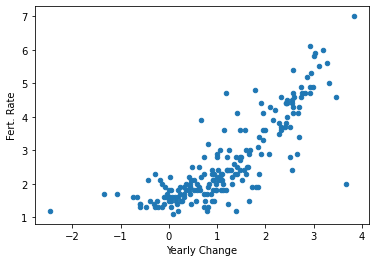

In [11]:
population.plot.scatter(
    x='Yearly Change', 
    y='Fert. Rate'
)

We can also customize the graph with a few additional parameters, making it easier to understand

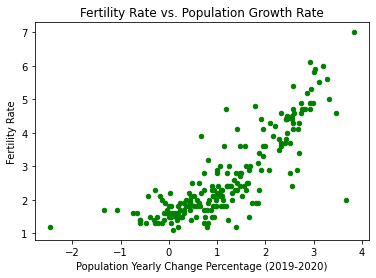

In [12]:
population.plot.scatter(
    x='Yearly Change', 
    y='Fert. Rate', 
    color='green',
    title='Fertility Rate vs. Population Growth Rate',
    xlabel='Population Yearly Change Percentage (2019-2020)',
    ylabel='Fertility Rate'
);     
# adding a ";" after a call to `plot` hides the plot object description

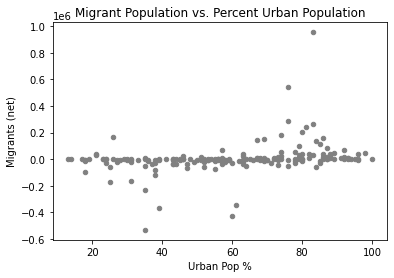

In [13]:
population.plot.scatter(
    x='Urban Pop %', 
    y='Migrants (net)', 
    color='grey', 
    title='Migrant Population vs. Percent Urban Population'
);

# Histogram

Used to see the shape, spread, and unusual observations (if any) of one numerical variable.
 * Shape: Uniform, skewed (left or right), symmetric...
 * Spread: identify the range (min and max values)
 * Unusual observations: outliers, gaps

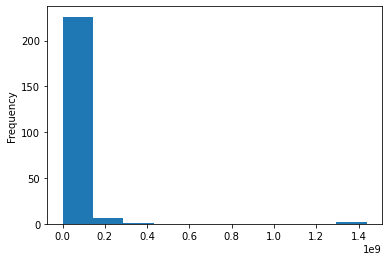

In [14]:
population['Population 2020'].plot.hist();

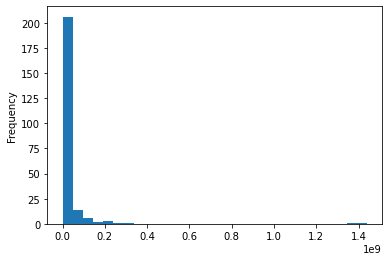

In [15]:
population['Population 2020'].plot.hist(bins=30);

<AxesSubplot:ylabel='Frequency'>

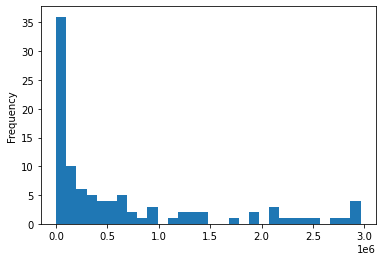

In [16]:
# Zoom in on the countries with popoulation greater than 3,000,000

display(population[population['Population 2020'] < 3_000_000]['Population 2020'].plot.hist(bins=30));

# Note how we can use underscores in place of commas to separate digits in long numbers

<AxesSubplot:ylabel='Frequency'>

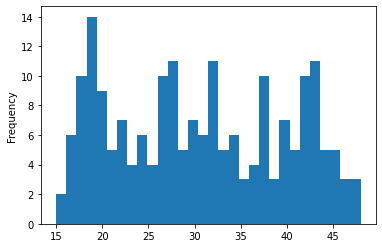

In [17]:
# we will graph another variable (med.age) using 30 bins in total
display(population['Med. Age'].plot.hist(bins=30));

 # Bar Plot

 Works betters when plotting **Categorical** data rather than **Numeric**

In this population data set, almost all variables are numeric (Except for the Country name), so we can create some categories: 

In [18]:
def categorize_age(median_age):
    if median_age <= 25: return 'younger'
    elif median_age < 37: return 'average'
    elif median_age >= 37: return 'older'
    else: return np.nan

population['Median Age (binned)'] = population['Med. Age'].apply(categorize_age)

display(population[['Country (or dependency)', 'Population 2020', 'Med. Age', 'Median Age (binned)']].sample(10))

,Country (or dependency),Population 2020,Med. Age,Median Age (binned)
166,Macao,649335.0,39.0,older
54,Australia,25499884.0,38.0,older
17,Iran,83992949.0,32.0,average
147,North Macedonia,2083374.0,39.0,older
153,Trinidad and Tobago,1399488.0,36.0,average
83,South Sudan,11193725.0,19.0,younger
180,Iceland,341243.0,37.0,older
60,Romania,19237691.0,43.0,older
110,Kyrgyzstan,6524195.0,26.0,average
116,Congo,5518087.0,19.0,younger


In [19]:
# How many countries fall in each of these median_age categories?
age_data = population.groupby('Median Age (binned)').size().reset_index().rename(columns={0:'n_countries'})
display(age_data)

,Median Age (binned),n_countries
0,average,68
1,older,62
2,younger,67


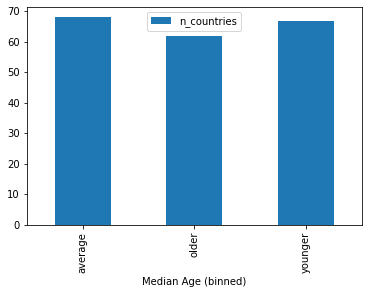

In [20]:
age_data.plot.bar(
    x='Median Age (binned)', 
    y='n_countries'
);

This bar graphs are fine, but we can make it better!

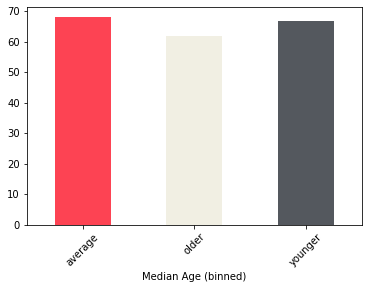

In [21]:

age_data.plot.bar(
    x='Median Age (binned)', 
    y='n_countries',
    legend=None,                                # remove that unhelpful legend
    rot=45,                                     # rotation angle of x-axis labels, 45 degrees
    color=['#FD4353', '#F1EFE3', '#54585E']     # custom Renaissance brand colors using hex-code
);

# Data Visualization for Others

As a data researcher, we generally use data visualizations for one of three purpuses: 

1. **Research:** To help ourselves better understand the data, by "Asking questions" of datasets
2. **Storytelling:** To highlight and communicate importnt details about the data for other stakeholders
3. **Dashboard:** To provide stakeholders with a way to *easily retrieve their own answers* to a pre-defined set of questions about datasets that change over time

## General Principles

**Type in chat:** What are two things you would change to improve/declutter this visualization?

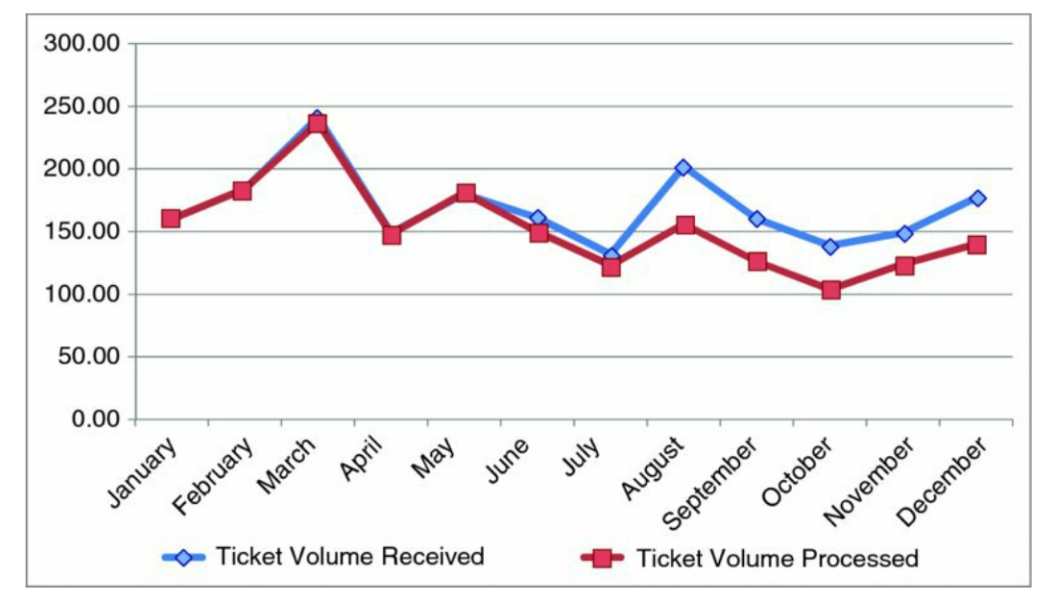

## Core Principles

* Data - Ink Rotation Maximixation
* One poperty to facet


Facets:
* location (x, y, z)
* size
* color
* shape


### Ensuring clarity with axes, ranges, and labels

In [22]:
##I will use a datas set called 'tickets'. 
## Let's see what the data set contains

tickets.head()

,month,ticket_volume_received,ticket_volume_processed
0,January,161,161
1,February,184,184
2,March,142,144
3,April,149,149
4,May,172,172


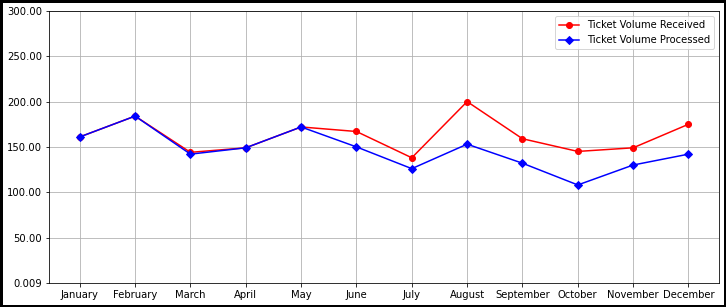

In [23]:
# code to reproduce graph above:
x = tickets['month']
y1 = tickets['ticket_volume_received']
y2 = tickets['ticket_volume_processed']

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()

ax.plot(x, y2, marker='o', label='Ticket Volume Received', color='red')
ax.plot(x, y1, marker='D', label='Ticket Volume Processed', color='blue')

ax.legend(loc=1)
ax.yaxis.set_major_formatter('{x:9<5.2f}')
ax.set_ylim(0,300)
ax.grid()
fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('black')

plt.show();

## Accessing element on a graph in `matplotlib`
* Figure size
* Colors
* Shape of Markers
* Title
* Gridlines
* Legends
* Spines
* Axis Rnage
* Axis Ticks
* Axis Labels


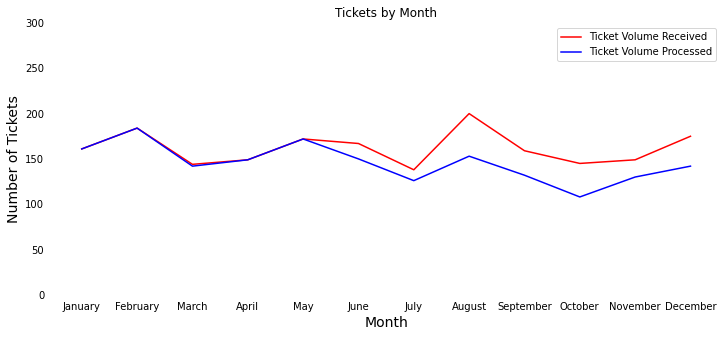

In [24]:
# Figure Size, Colors, Shape of Markers, Title, Grid Lines, 
# Legends, Spines, Axis Range, Axis Ticks, Axis Labels

#fig = plt.figure()
#ax = fig.add_subplot()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()

#ax.plot(x, y2)
#ax.plot(x, y1)

ax.plot(x, y2, label='Ticket Volume Received' , color='red')
ax.plot(x, y1, label='Ticket Volume Processed', color='blue')

ax.set_title('Tickets by Month')
#ax.grid()
#ax.grid(axis='both') # default
#ax.grid(axis='y')
ax.legend(loc=1)

#ax.yaxis.set_major_formatter('{x:9<5.2f}') # precision of axis labels
ax.set_ylim(0, 300)

#ax.spines['top'].set_visible(False)
#ax.spines[['top', 'right']].set_visible(False)
ax.spines[:].set_visible(False)
#ax.spines['top'].set_color('green')

#ax.tick_params(bottom=False, left=True, right=True, top=True)
ax.tick_params(bottom=False, left=False)

ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Tickets', fontsize=14)

#fig.patch.set_linewidth(5)
#fig.patch.set_edgecolor('black')

plt.show()

Let's clean up our original graph

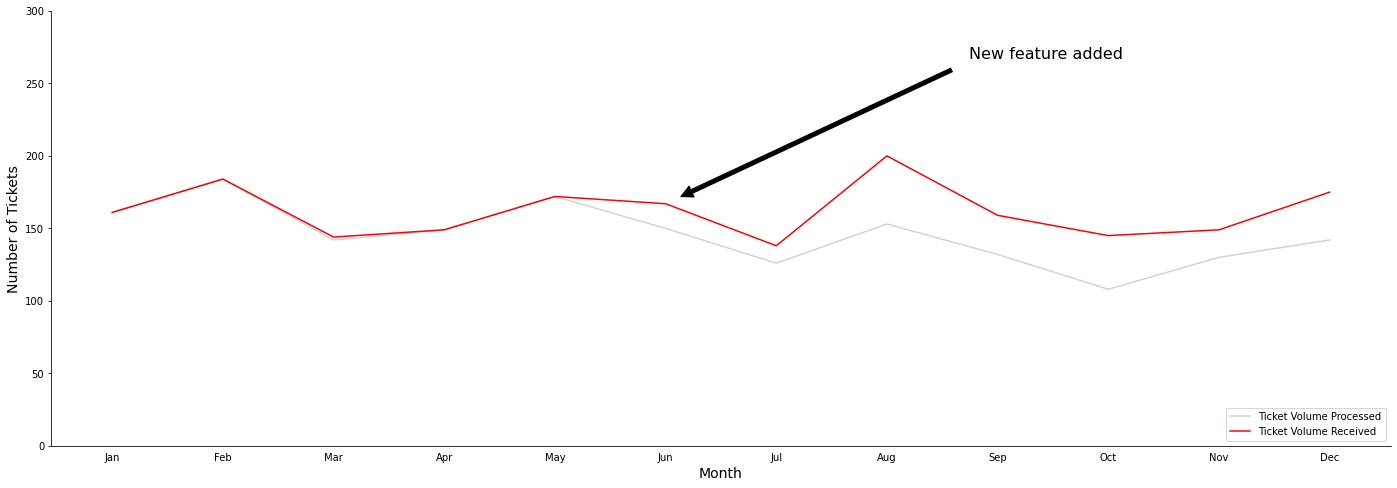

In [25]:
x2 = [m[:3] for m in x] # shorten month names to first 3 letters
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot()

ax.plot(x2, y1, label='Ticket Volume Processed', color='lightgrey')
ax.plot(x2, y2, label='Ticket Volume Received', color='red')

ax.annotate('New feature added', (5, y2[5]), xytext=(0.8, 0.9), 
    textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=16, horizontalalignment='right', verticalalignment='center'
)

ax.legend(loc=4)
ax.set_ylim(0, 300)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Tickets', fontsize=14)

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(bottom=False)

plt.show()

## Choosing the right visualization for your story

Some graphs are better suited than others for certain data

* **Barplot**: Comparing categorical data
* **Scaterplot**: Showing shape and patters in all data points
* **Connected lines** (linegraph): Showing a trend over time
* **Pies chart**: Not a lot...

## Effective Communication

* Make sure no more than one or two insights jump off the graph
* Use color, size, and labels to call attention to important elements
* If there is nothing obvious, you can add a text box to tell people what they should see


### Ways to mislead (confuse) people

1. Omit the baseline
2. Cherry picking data
3. Manupulating the y-axis
4. Using the Wrong Graph
5. Going against conventionst Conventions

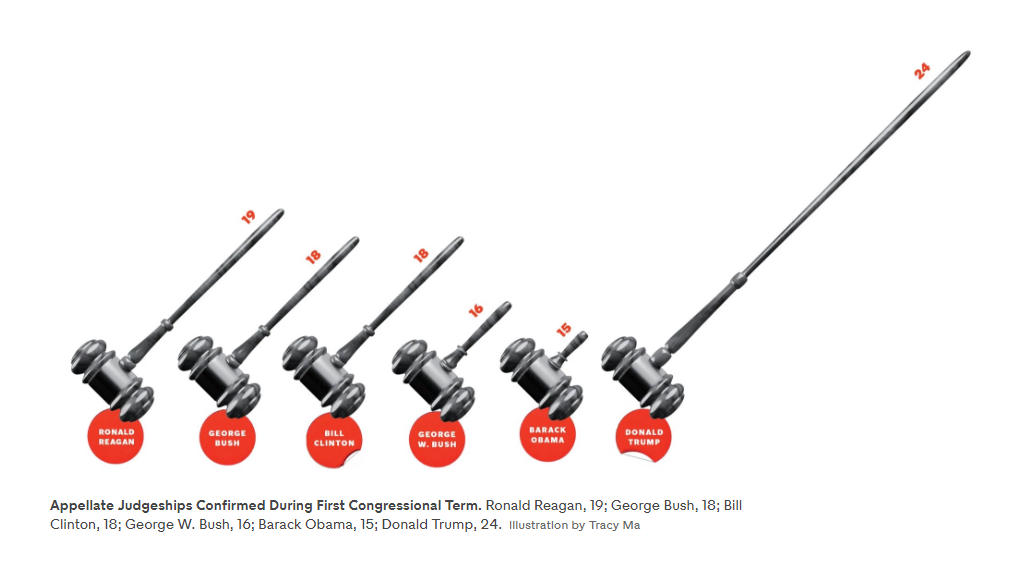

What do you see in the graph above?  
What is confusing about the graph?

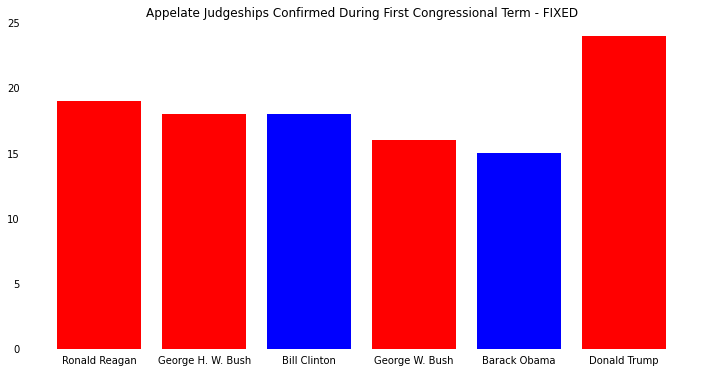

In [26]:
# Using the presidential_appointments dataset (pres_data)

pres = pres_data['president']
party = pres_data['party']
appts = pres_data['appointments']
cmap = {'Republican': 'red', 'Democrat': 'blue'}

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.bar(pres, appts, color=[cmap[p] for p in party])

ax.set_title('Appelate Judgeships Confirmed During First Congressional Term - FIXED')
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False,  left=False)
ax.set_ylim(0, 25)

plt.show()

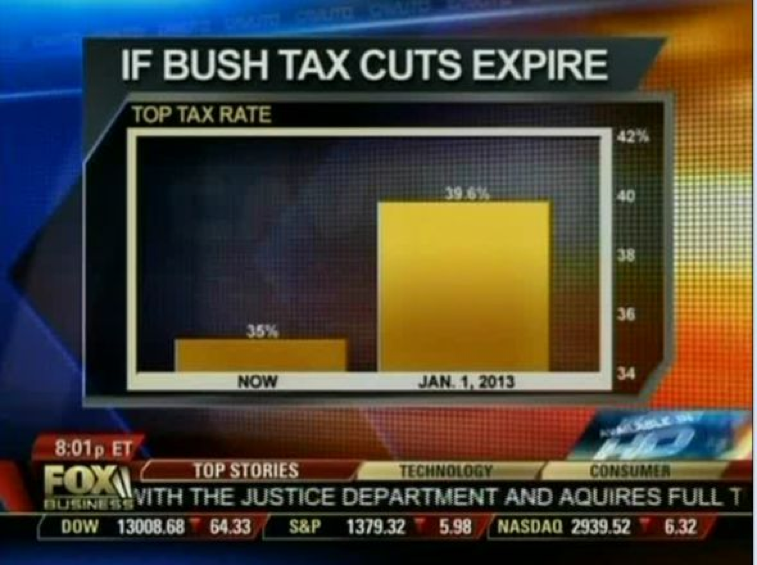

Question:
- What is confusing about the graph above?
- How can it be fixed?

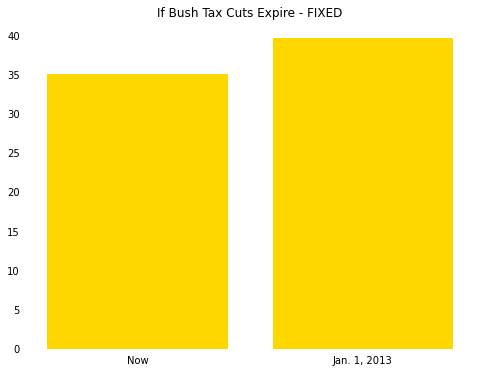

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.bar(['Now', 'Jan. 1, 2013'], [35, 39.6], color='gold')
ax.set_title('If Bush Tax Cuts Expire - FIXED')
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

## Wrap up

### Recommendations
Matplotlib can be very simple, but it gets complicated fast!

Start simple: 

* Alter color, axis, labels, add a legend
* Find examples online, and apply these to your graph
* Do not try to much at once!
* Ask someone else who does not know your dataset to describe what they see
    By now, you know the data too well to see it with fresh eyes


### To-dos
1. Examine one or more of your data sets
2. Calculate statistics on some key data fields
3. Create 3 or more graphs of your dataset, consider what we discussed today
4. Start collecting your ideas into your paper outline
5. Post a link to your GitHub account on Slack
6. Post an example of your work in our slack's `#python` channel. Can be data cleaning, statistical analysis, or graph
7. Share a short summary (5-10 sentences) of your reaserch progress so far in the `#research` channel on Slack

## Resources

- Data Vizualization Concepts
    - [Data-Ink Principle (Edward Tufte)](https://jtr13.github.io/cc19/tuftes-principles-of-data-ink.html)
    - [A Layered Graphics of Grammar (Hadley Wickham)](https://vita.had.co.nz/papers/layered-grammar.pdf)
    - [5 Ways Writers Use Misleading Graphs to Manipulate](https://venngage.com/blog/misleading-graphs/)
  
  
- [matplotlib](https://matplotlib.org/stable/index.html)
    - [Examples](https://matplotlib.org/stable/gallery/index.html)
    - [Tutorials](https://matplotlib.org/stable/tutorials/index.html)
    - [Colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
    - [Markers](https://matplotlib.org/stable/api/markers_api.html)
